In [1]:
import pandas as pd
from IPython.display import display
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

import scipy
from scipy.stats._continuous_distns import _distn_names

import warnings

In [2]:
df=pd.read_csv("..\\M&M MSA\\Dataset\\df_wine.csv",index_col=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_code
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,0


<h3>NOTE. For this lab you need subsample with 3-5 random variables, at least half of them should be described with continuous random variable type.

Step 1. Choose subsample with main variables for your further analysis. Then for each of them:</h3>

In [3]:
variables = ["fixed acidity","residual sugar","density","pH","alcohol"]
#5000 samples
subsample = df[variables].sample(5000, replace=False, random_state=7266)

print(subsample.shape)
print(subsample.dtypes)
subsample

(5000, 5)
fixed acidity     float64
residual sugar    float64
density           float64
pH                float64
alcohol           float64
dtype: object


,fixed acidity,residual sugar,density,pH,alcohol
6247,6.9,2.8,0.99518,3.41,10.8
5977,7.9,8.3,0.99316,3.01,12.3
1194,6.2,8.3,0.99640,3.33,9.6
6233,6.6,2.4,0.99387,3.38,12.6
5799,7.4,2.4,0.99736,3.58,10.8
...,...,...,...,...,...
5617,7.1,3.9,0.99760,3.46,9.5
1994,7.0,14.6,0.99940,3.34,8.8
5333,12.3,2.3,1.00040,3.16,9.5
1509,7.9,1.6,0.99300,3.16,10.5


In [4]:
subsample.describe()

,fixed acidity,residual sugar,density,pH,alcohol
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,7.233420,5.39722,0.994680,3.219474,10.507036
std,1.322239,4.66874,0.002941,0.158476,1.187752
min,4.200000,0.60000,0.987130,2.740000,8.000000
25%,6.400000,1.80000,0.992300,3.110000,9.500000
50%,7.000000,3.00000,0.994800,3.210000,10.400000
75%,7.700000,8.00000,0.996920,3.320000,11.300000
max,15.900000,31.60000,1.010300,4.010000,14.900000


<h3>Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function (or probability law in case of discrete RV).</h3>

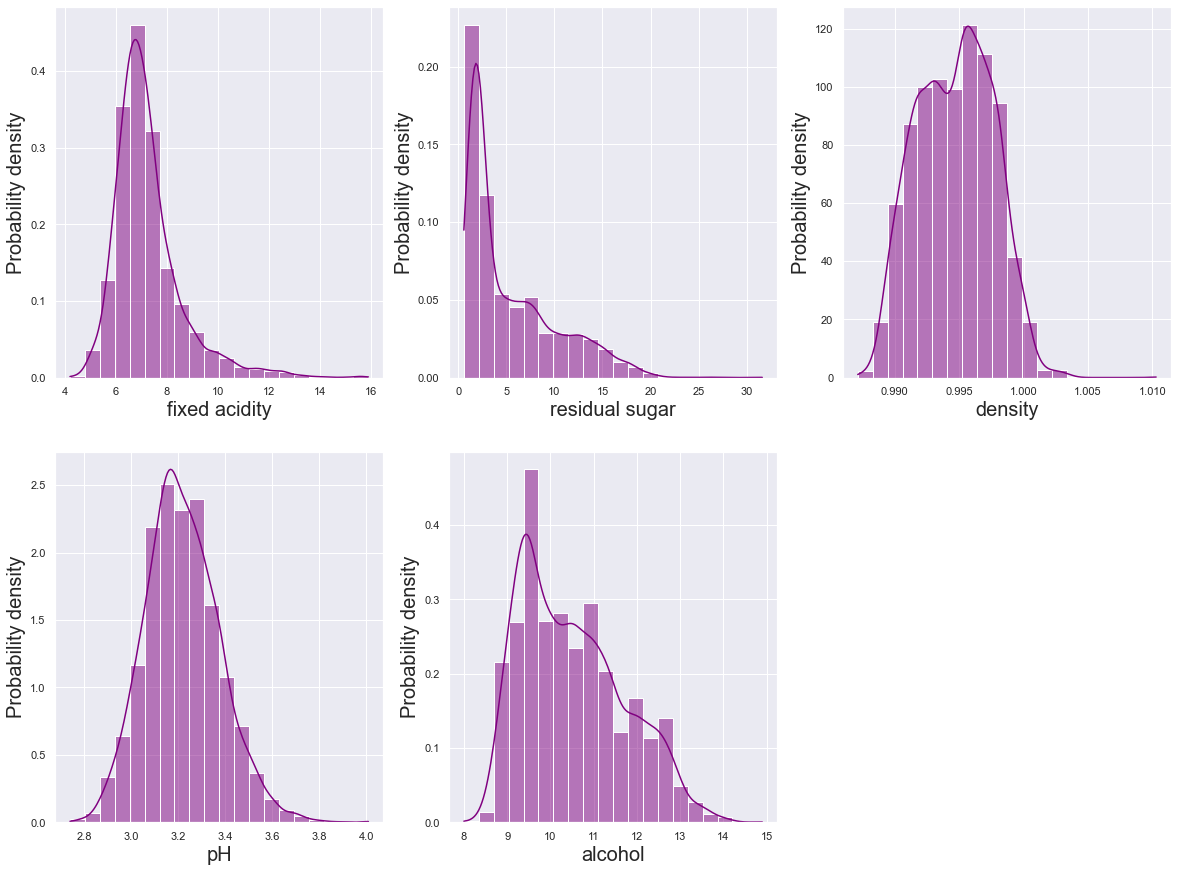

In [5]:
for i in range(0,5):
    plt.subplot(2, 3, i+1)

    col=variables[i]

    ax=sns.histplot(subsample[col],stat="density",bins=20,common_norm=False,color="purple",kde=True)
    ax.set(ylabel="Probability density")


<h3>Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.</h3>

In [6]:
descr=subsample.describe()
#+Variance
descr=descr.append(np.var(subsample).rename("var"))
#+Interquartile range
descr=descr.append((descr.loc["75%"]-descr.loc["25%"]).rename("iqr"))
descr

,fixed acidity,residual sugar,density,pH,alcohol
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.233420,5.397220,0.994680,3.219474,10.507036
std,1.322239,4.668740,0.002941,0.158476,1.187752
min,4.200000,0.600000,0.987130,2.740000,8.000000
25%,6.400000,1.800000,0.992300,3.110000,9.500000
50%,7.000000,3.000000,0.994800,3.210000,10.400000
75%,7.700000,8.000000,0.996920,3.320000,11.300000
max,15.900000,31.600000,1.010300,4.010000,14.900000
var,1.747965,21.792778,0.000009,0.025110,1.410473
iqr,1.300000,6.200000,0.004620,0.210000,1.800000


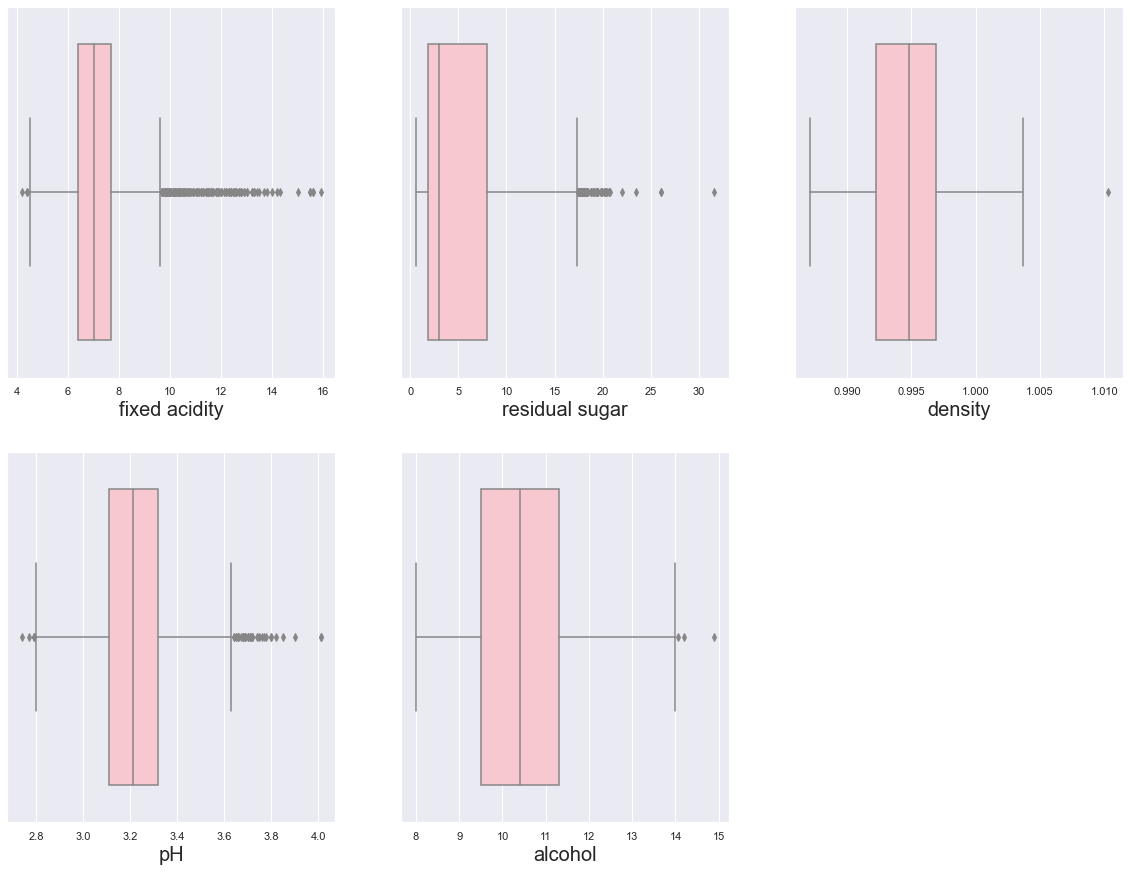

In [7]:
for i in range(0,5):
    plt.subplot(2, 3, i+1)

    col=variables[i]

    sns.boxplot(x=subsample[col],color="pink")

<h3>Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.</h3>

In [158]:
#We will find the best distributions from scipy.stats for every feature
#From https://stackoverflow.com/a/37616966
def best_fit_distribution(data, bins=30, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, dist_name in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        #print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))
        
        #For every distribution from scipy.stats
        distribution = getattr(scipy.stats, dist_name)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append({"distribution":dist_name, "params":params, "sse":sse})
        
        except Exception:
            pass

    return best_distributions


In [159]:
dists_df=pd.DataFrame()
for v in variables:
    dists=pd.DataFrame(best_fit_distribution(subsample[v]))
    dists=dists.sort_values(by = "sse")

    print(v, ": ")
    display(dists.head(5))

    dists["feature"]=v
    dists_df=dists_df.append(dists.head(1))
dists_df

fixed acidity : 


,distribution,params,sse
10,burr12,"(17.457213206105433, 0.43126125440220897, -0.1...",0.004487
50,johnsonsu,"(-1.0952690567884948, 1.3717520947648405, 6.10...",0.005157
61,mielke,"(7.502091858499206, 5.269223804255244, 3.42431...",0.008410
11,fisk,"(4.87916559873255, 4.002454550787068, 2.989364...",0.009300
19,exponnorm,"(2.029832022380018, 6.104161293356323, 0.55633...",0.009769


residual sugar : 


,distribution,params,sse
3,alpha,"(3.258671236998796e-07, 0.10212799390540855, 2...",0.008675
61,mielke,"(9.450991046283477, 1.2197802273033354, 0.4065...",0.009833
9,burr,"(1.2324175856045407, 17.62490821006689, 0.3175...",0.009887
31,genextreme,"(-0.802457094184855, 2.4075915294084567, 1.747...",0.009956
48,invweibull,"(1.246212438902945, 0.22978309972543692, 2.177...",0.009957


density : 


,distribution,params,sse
94,gennorm,"(3.079335044725526, 0.9946751524118265, 0.0048...",1686.144458
79,rice,"(2.1228158999397353, 0.9870964273243755, 0.003...",4819.424090
48,johnsonsb,"(0.8853362441337739, 2.415534276595851, 0.9821...",4915.615469
10,burr12,"(1002465.577180611, 247462.08700711583, -3236....",5161.572343
55,loggamma,"(770.1065057671983, 0.45200986708445423, 0.081...",5420.342048


pH : 


,distribution,params,sse
83,skewnorm,"(1.620290680234444, 3.0730924581129173, 0.2157...",0.424922
20,exponweib,"(8.671720799508162, 2.7755811023498875, 2.2035...",0.429638
50,johnsonsu,"(-4.343773342514402, 5.569143754805529, 2.6456...",0.430719
3,alpha,"(17.27875949859375, 0.510561594332452, 46.6486...",0.433243
44,invgamma,"(124.09557560896579, 1.4629497861169214, 216.2...",0.434272


alcohol : 


,distribution,params,sse
83,skewnorm,"(8.073854118893864, 8.901847939404384, 1.99677...",0.129868
49,johnsonsb,"(1.0929637962498548, 1.35639953241941, 7.94159...",0.154512
81,recipinvgauss,"(0.17842611475842662, 7.517920820449374, 0.452...",0.160714
46,geninvgauss,"(3.239733323738484, 3.4966167168098177, 7.7760...",0.160844
22,fatiguelife,"(0.4039668788876283, 7.459494140793444, 2.8174...",0.161231


,distribution,params,sse,feature
10,burr12,"(17.457213206105433, 0.43126125440220897, -0.1...",0.004487,fixed acidity
3,alpha,"(3.258671236998796e-07, 0.10212799390540855, 2...",0.008675,residual sugar
94,gennorm,"(3.079335044725526, 0.9946751524118265, 0.0048...",1686.144458,density
83,skewnorm,"(1.620290680234444, 3.0730924581129173, 0.2157...",0.424922,pH
83,skewnorm,"(8.073854118893864, 8.901847939404384, 1.99677...",0.129868,alcohol


<h3>Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.</h3>

In [161]:
#list of dictionaries for parameters
# - feature
# - distribution
# - MLE_params
# - LSE_params
params_list=[]

for i in range(0,5):
    v=variables[i]
    feature_d=dists_df[dists_df.feature==v].distribution.values[0]

    #fit computes params by MLE
    dist=getattr(scipy.stats, feature_d)
    MLE_params=dist.fit(subsample[v],loc=5,scale=1)
    
    q_spl=30
    q = np.linspace(0.005, 0.995, num=q_spl)
    data_q = np.quantile(subsample[v], q)

    #LSE
    LSE_params=[]
    if(feature_d=="burr12"):
        LSE_params = scipy.optimize.least_squares(lambda params: data_q - dist.ppf(q, *params), (20, 1, 1, 1))['x']
    else:
        LSE_params = scipy.optimize.least_squares(lambda params: data_q - dist.ppf(q, *params), (2, 3, 0.1))['x']

    params_list.append({"feature":v,"distribution":feature_d,"MLE_params":MLE_params,"LSE_params":LSE_params})

params_df=pd.DataFrame(params_list)

params_df

,feature,distribution,MLE_params,LSE_params
0,fixed acidity,burr12,"(14.772823534980972, 0.4578799178952402, 0.737...","[56.4525811201958, 0.3037488189356843, -11.706..."
1,residual sugar,alpha,"(4.7209951490836304e-07, 0.10610335883828853, ...","[6.1639134293502, -18.55567842527029, 143.4609..."
2,density,gennorm,"(3.0793945603670823, 0.9946751568137912, 0.004...","[3.833495536163269, 0.9946886688505747, 0.0050..."
3,pH,skewnorm,"(1.6205105444157484, 3.0730775642911503, 0.215...","[1.7318577018066847, 3.0679431528265972, 0.219..."
4,alcohol,skewnorm,"(8.073847850735994, 8.901848446043454, 1.99677...","[4.391823074333073, 9.077183545728564, 1.82450..."


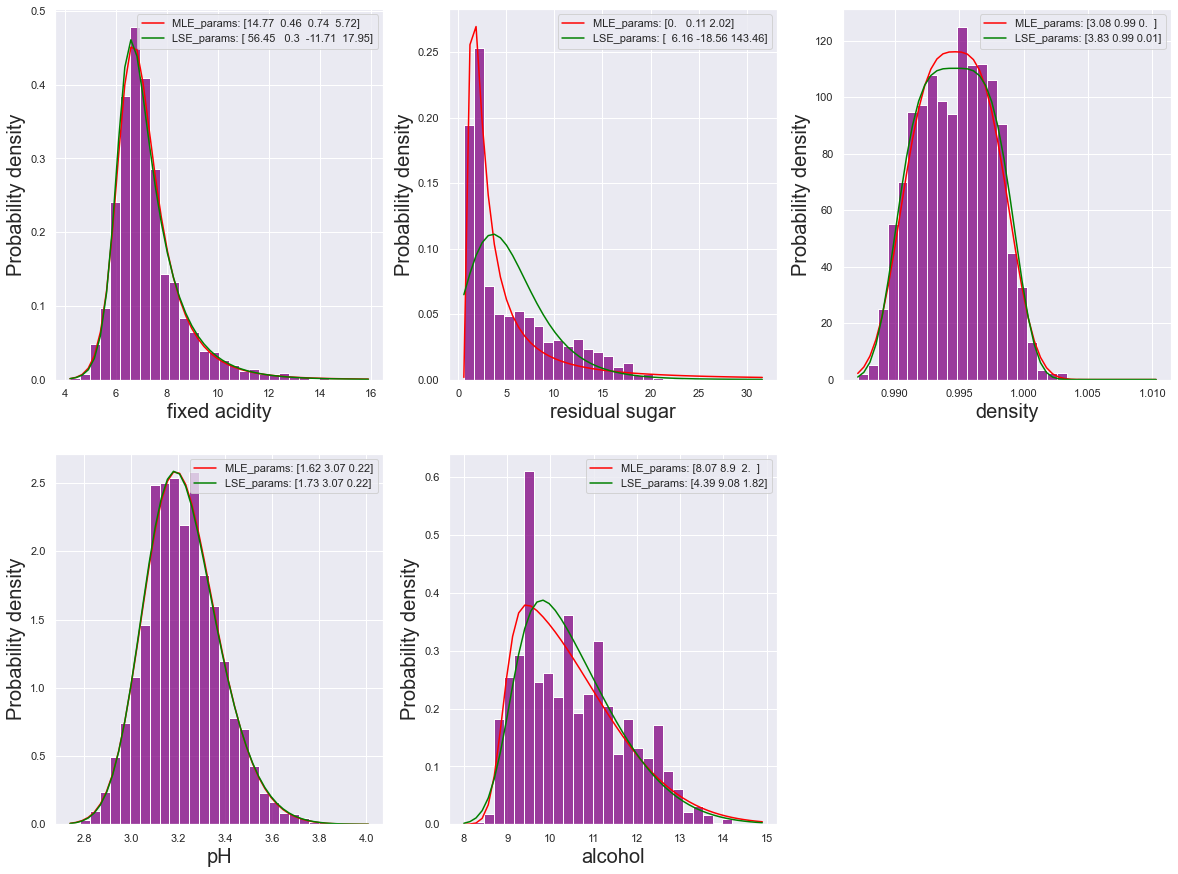

In [162]:
for i in range(0,5):
    params=params_df.iloc[i,:]
    data=subsample[params["feature"]]
    dist=getattr(scipy.stats, params["distribution"])

    plt.subplot(2, 3, i+1)

    x = np.linspace(np.min(data), np.max(data))
    
    ax=sns.histplot(data=data,stat="density",bins=30,common_norm=False,color="purple")

    sns.lineplot(x=x,y=dist.pdf(x,*params["MLE_params"]),color="red",label="MLE_params: "+str(np.round(params["MLE_params"],2)))
    sns.lineplot(x=x,y=dist.pdf(x,*params["LSE_params"]),color="green",label="LSE_params: "+str(np.round(params["LSE_params"],2)))

    ax.legend()

    ax.set(ylabel="Probability density")

<h3>Step 6. Validate your estimated parameters using QQ biplots.</h3>

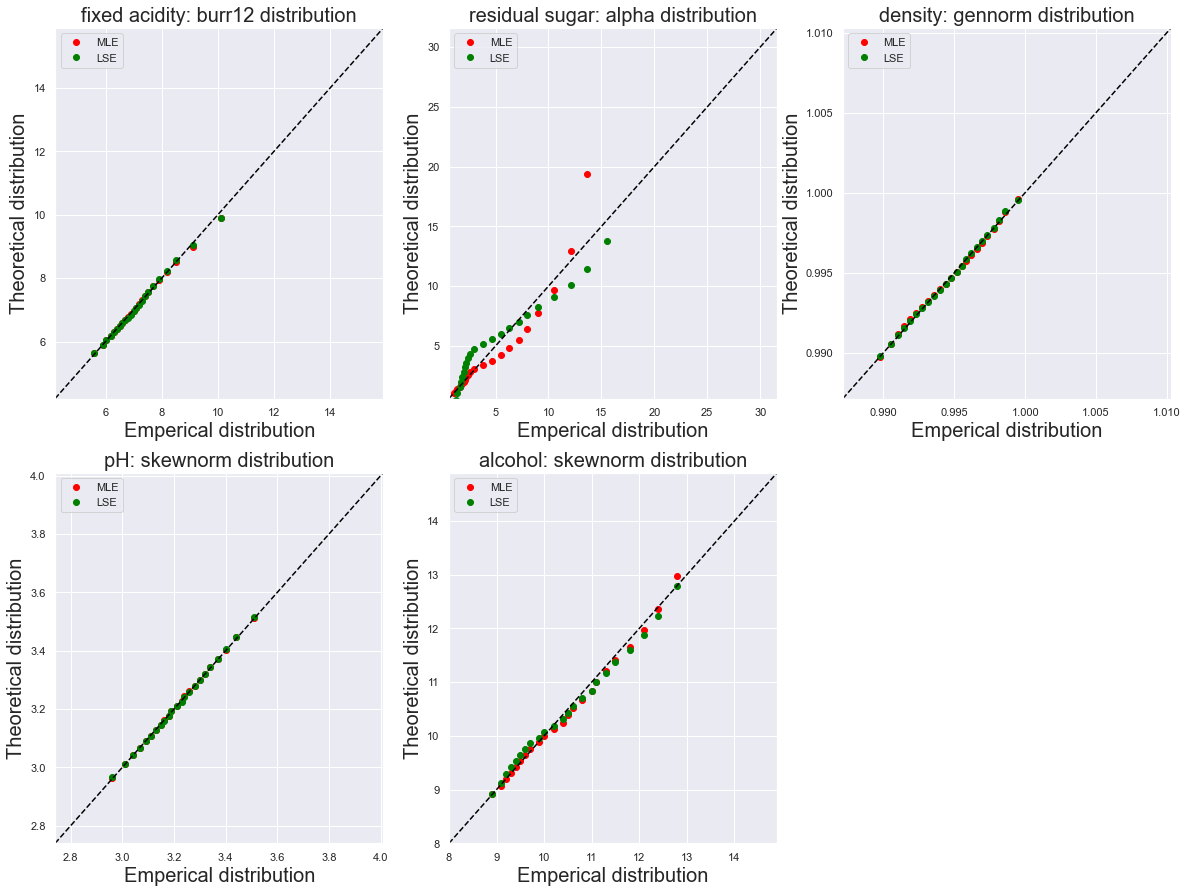

In [167]:
for i in range(0,5):
    params=params_df.iloc[i,:]
    data=subsample[params["feature"]]
    dist=getattr(scipy.stats, params["distribution"])

    plt.subplot(2, 3, i+1)

    x = np.linspace(np.min(data), np.max(data))
    q_spl=25
    q = np.linspace(0.0, 1, num=q_spl)
    data_q = np.quantile(data, q)

    
    plt.plot(data_q,dist.ppf(q,*params["MLE_params"]),color="red",marker="o", ls="",label="MLE")
    plt.plot(data_q,dist.ppf(q,*params["LSE_params"]),color="green",marker="o", ls="",label="LSE")
    plt.plot(x,x,ls="--",color="black")
    plt.legend()
    plt.xlim(np.min(data), np.max(data))
    plt.ylim(np.min(data), np.max(data))

    plt.title(params["feature"]+": "+params["distribution"]+" distribution")
    plt.xlabel("Emperical distribution")
    plt.ylabel("Theoretical distribution")

<h3>Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.</h3>

In [174]:
#Kolmogorov-Smirnov
for i in range(0,5):
    params=params_df.iloc[i,:]
    data=subsample[params["feature"]]
    dist=getattr(scipy.stats, params["distribution"])

    ks=scipy.stats.kstest(data,params["distribution"],params["MLE_params"])
    cr=scipy.stats.cramervonmises(data,params["distribution"],params["MLE_params"])

    print(params["feature"])
    print("MLE:")
    print("    ",ks)
    print("    ",str(cr))

    ks=scipy.stats.kstest(data,params["distribution"],params["LSE_params"])
    cr=scipy.stats.cramervonmises(data,params["distribution"],params["LSE_params"])

    print("LSE:")
    print("    ",ks)
    print("    ",str(cr)+"\n")



fixed acidity
MLE:
     KstestResult(statistic=0.030821896789325787, pvalue=0.00014644160252390021)
     CramerVonMisesResult(statistic=0.596238509277666, pvalue=0.022862951255019137)
LSE:
     KstestResult(statistic=0.0413871843749446, pvalue=7.039010812385975e-08)
     CramerVonMisesResult(statistic=0.9091245729634593, pvalue=0.004023916201694955)

residual sugar
MLE:
     KstestResult(statistic=0.08647682516917898, pvalue=5.56679072931329e-33)
     CramerVonMisesResult(statistic=8.905939507468284, pvalue=2.2029422730440729e-10)
LSE:
     KstestResult(statistic=0.19853673780925613, pvalue=3.416571167076597e-173)
     CramerVonMisesResult(statistic=42.5418079682455, pvalue=4.5983419294515215e-09)

density
MLE:
     KstestResult(statistic=0.025163898747814384, pvalue=0.00349486836550819)
     CramerVonMisesResult(statistic=0.6491577603977754, pvalue=0.01693893280850467)
LSE:
     KstestResult(statistic=0.021159805347814475, pvalue=0.02240253391188217)
     CramerVonMisesResult(statisti